In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import average_precision_score, classification_report

## Load data

In [4]:
train_df = pd.read_csv('/content/split_train.csv')
val_df = pd.read_csv('/content/split_val.csv')
test_df = pd.read_csv('/content/split_test.csv')

train_df.shape, val_df.shape, test_df.shape

((21004, 21), (4501, 21), (4491, 21))

In [5]:
import pandas as pd

df = pd.DataFrame(train_df)

# Convert label_columns to strings to match column names
label_columns = [str(col) for col in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18 ,19]]

# Condition pour supprimer les lignes avec uniquement le label 1
condition = (df['1'] == 1) & (df[label_columns].sum(axis=1) == 1)

# Filtrer les lignes qui ne respectent pas cette condition
train_df = df[~condition]

# Afficher le résultat
train_df

,ImageID,Caption,ImageURL,1,2,3,4,5,6,7,...,9,10,11,13,14,15,16,17,18,19
0,21999.jpg,A couple of men standing next to a train on a ...,../data/image_classification/data/21999.jpg,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,10911.jpg,An empty bench sits next to a river.,../data/image_classification/data/10911.jpg,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11565.jpg,Three people in orange vests watch a space shu...,../data/image_classification/data/11565.jpg,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23495.jpg,A traffic light with a street sigh hanging fro...,../data/image_classification/data/23495.jpg,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,15893.jpg,A little boy standing by a red and blue fire h...,../data/image_classification/data/15893.jpg,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20999,25307.jpg,A large bird with a massive beak sitting up in...,../data/image_classification/data/25307.jpg,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21000,6326.jpg,a man that is next to a big brown horse,../data/image_classification/data/6326.jpg,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21001,1003.jpg,A couple of dogs standing in the grass.,../data/image_classification/data/1003.jpg,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
21002,18525.jpg,Guys on skateboards scaring pigeons away from ...,../data/image_classification/data/18525.jpg,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
condition.value_counts()

,count
False,11132
True,9872


In [7]:
# Installer le package Kaggle
!pip install kaggle

# Créer un répertoire pour stocker les informations d'identification Kaggle
!mkdir -p ~/.kaggle

# Télécharger le fichier kaggle.json contenant vos informations d'identification
# Assurez-vous d'avoir téléchargé ce fichier sur votre environnement Colab
from google.colab import files
files.upload()

# Déplacer le fichier kaggle.json dans le répertoire .kaggle et définir les permissions appropriées
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Télécharger les données de la compétition Kaggle
!kaggle competitions download -c multi-label-classification-competition-2023

# Décompresser les données téléchargées
!unzip multi-label-classification-competition-2023.zip -d data

# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import average_precision_score, classification_report

# Vous pouvez maintenant charger et explorer vos données
# Par exemple :
# df = pd.read_csv('data/train.csv')
# print(df.head())


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/COMP5329S1A2Dataset/data/550.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5500.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5501.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5502.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5503.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5504.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5505.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5506.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5507.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5508.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5509.jpg  
  inflating: data/COMP5329S1A2Dataset/data/551.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5510.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5511.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5512.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5513.jpg  
  inflating: data/COMP5329S1A2Dataset/data/5514.jpg  
  infl

## Preprocess data

In [8]:
def augment_image(image):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05)
    image = tf.clip_by_value(image + noise, 0.0, 1.0)
    return image

# Function to load images
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize for model input
    image = image / 255.0  # normalize
    return image

def process_labels(labels):
    return tf.convert_to_tensor(labels, dtype=tf.float32)

import os

def augment_and_duplicate_minority_classes(df, minority_classes, augmentation_factor=3, output_dir="data/COMP5329S1A2Dataset/data/"):
    augmented_data = []
    os.makedirs(output_dir, exist_ok=True)

    for _, row in df.iterrows():
        # Convertir les labels en liste pour identifier les classes actives
        labels = row.iloc[3:].values
        if row['1'] == 1:
          continue
        if any(labels[i] == 1 and i in minority_classes for i in range(len(labels))):
            # Charger l'image originale
            image_path = 'data/COMP5329S1A2Dataset/data/' + row['ImageID']
            image = load_image(image_path)

            # Appliquer l'augmentation plusieurs fois
            for i in range(augmentation_factor):
                augmented_image = augment_image(image)

                # Générer un nom unique pour l'image augmentée
                new_image_name = f"augmented_{len(augmented_data)}_{row['ImageID']}"
                new_image_path = os.path.join(output_dir, new_image_name)

                # Sauvegarder l'image augmentée
                tf.keras.preprocessing.image.save_img(new_image_path, augmented_image.numpy())

                # Ajouter une nouvelle ligne au DataFrame
                new_row = row.copy()
                new_row['ImageID'] = new_image_name
                augmented_data.append(new_row)

    # Supprim
    # Calculer la somme des labels pour chaque ligne
    label_columns = df.columns[3:]
    label_sum = df[label_columns].sum(axis=1)

    # Identifier les lignes où le seul label actif est 1
    rows_to_remove = (label_sum == 1) & (df[label_columns[0]] == 1)

    # Filtrer le DataFrame pour exclure ces lignes
    filtered_df = df[~rows_to_remove]

    return pd.concat([df, pd.DataFrame(augmented_data)], ignore_index=True)


# Exemple d'utilisation
minority_classes = [2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18 ,19]  # Classes minoritaires à augmenter
augmented_train_df = augment_and_duplicate_minority_classes(train_df, minority_classes, augmentation_factor=5)


In [9]:
# Convert one-hot labels to numpy array
labels_array = np.array(augmented_train_df.iloc[:, 3:].values)

class_counts = labels_array.sum(axis=0)  # Count samples per class

# Compute class weights (inverse frequency)
class_weights = {i: len(labels_array) / (len(class_counts) * class_counts[i]) for i in range(len(class_counts))}

# Function to compute sample weights based on the labels
def compute_sample_weights(labels, class_weights):
    return np.array([sum(class_weights[i] * label[i] for i in range(len(label))) for label in labels])

# Compute sample weights for each sample
sample_weights = compute_sample_weights(labels_array, class_weights)
print(sample_weights)

[1.56742047 0.63055288 0.93072972 ... 0.61014282 0.61014282 0.61014282]


In [10]:
augmented_train_df.shape

(35287, 21)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices('data/COMP5329S1A2Dataset/data/' + augmented_train_df['ImageID']).map(load_image),
    tf.data.Dataset.from_tensor_slices(process_labels(augmented_train_df.iloc[:, 3:].values)),
    tf.data.Dataset.from_tensor_slices(sample_weights)
)).batch(32).prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices('data/COMP5329S1A2Dataset/data/' + val_df['ImageID']).map(load_image),
    tf.data.Dataset.from_tensor_slices(process_labels(val_df.iloc[:, 3:].values))
)).batch(32).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.zip((
    tf.data.Dataset.from_tensor_slices('data/COMP5329S1A2Dataset/data/' + test_df['ImageID']).map(load_image),
    tf.data.Dataset.from_tensor_slices(process_labels(test_df.iloc[:, 3:].values))
)).batch(32).prefetch(AUTOTUNE)

In [12]:
for img, label, _ in train_ds.take(1):
    print(img.shape, label.shape, label.shape)

(32, 224, 224, 3) (32, 18) (32, 18)


In [34]:
import numpy as np
import pandas as pd

def evaluate_label_distribution(dataset):
    label_counts = None

    # Parcourir le dataset batch par batch
    for _, labels in dataset.unbatch().as_numpy_iterator():
        if label_counts is None:
            label_counts = np.zeros(labels.shape[0])

        label_counts += labels

    label_names = [f"label_{i}" for i in range(1, len(label_counts) + 1)]
    distribution_df = pd.DataFrame({
        "Label": label_names,
        "Count": label_counts,
        "Percentage": (label_counts / np.sum(label_counts)) * 100
    })

    return distribution_df

In [13]:
# Exemple d'utilisation
distribution_before = evaluate_label_distribution(train_ds)
print("Répartition :")
print(distribution_before)

Répartition :
       Label   Count  Percentage
0    label_1  6115.0   11.017025
1    label_2  1244.0    2.241240
2    label_3  7627.0   13.741104
3    label_4  1326.0    2.388974
4    label_5  3213.0    5.788668
5    label_6  2134.0    3.844699
6    label_7  3181.0    5.731015
7    label_8  4198.0    7.563283
8    label_9  2013.0    3.626700
9   label_10  3079.0    5.547248
10  label_11  1628.0    2.933069
11  label_12  1693.0    3.050176
12  label_13   479.0    0.862985
13  label_14  3109.0    5.601297
14  label_15  3556.0    6.406630
15  label_16  5100.0    9.188361
16  label_17  3906.0    7.037204
17  label_18  1904.0    3.430322


In [14]:
augmented_train_df.iloc[:, 3:].sum()


,0
1,6115
2,1244
3,7627
4,1326
5,3213
6,2134
7,3181
8,4198
9,2013
10,3079


## Conception du CNN

### Base CNN

In [15]:
from tensorflow.keras import layers, models

# Define the minimal CNN architecture
def create_minimal_cnn(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example usage
input_shape = (224, 224, 3)  # Example input shape for images
num_classes = len(train_df.columns[3:])  # Number of classes based on the labels
model = create_minimal_cnn(input_shape, num_classes)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.AUC(name='AUC', multi_label=True, num_labels=len(train_df.columns[3:])),  # Adjust num_labels as needed
        'accuracy',
        tf.keras.metrics.Precision()
    ]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,690,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,712,338 (98.08 MB)

 Trainable params: 25,712,146 (98.08 MB)

 Non-trainable params: 192 (768.00 B)

In [27]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds.map(lambda img, label, weight: (img, label)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

# Evaluate model
print("Evaluating model...")
model.evaluate(
    test_ds.map(lambda img, label: (img, label)),
    verbose=1
)

Epoch 1/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 64s 58ms/step - AUC: 0.5378 - accuracy: 0.3797 - loss: 0.2984 - precision: 0.4750 - val_AUC: 0.5412 - val_accuracy: 0.0438 - val_loss: 0.6898 - val_precision: 0.0000e+00
Epoch 2/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 60s 54ms/step - AUC: 0.5399 - accuracy: 0.3755 - loss: 0.2966 - precision: 0.4428 - val_AUC: 0.5418 - val_accuracy: 0.0438 - val_loss: 0.6121 - val_precision: 0.0000e+00
Epoch 3/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - AUC: 0.5399 - accuracy: 0.3699 - loss: 0.2962 - precision: 0.4251 - val_AUC: 0.5342 - val_accuracy: 0.0442 - val_loss: 0.5457 - val_precision: 0.0000e+00
Epoch 4/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - AUC: 0.5411 - accuracy: 0.3643 - loss: 0.2963 - precision: 0.4089 - val_AUC: 0.5330 - val_accuracy: 0.0449 - val_loss: 0.4984 - val_precision: 0.0000e+00
Epoch 5/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 59s 54ms/step - AUC: 0.5448 - accuracy: 0.3606 - loss: 0.2961 - precision: 0.3976 - val_AUC: 0.5359 - val_accuracy:

[0.47397229075431824, 0.530470073223114, 0.03918949142098427, 0.0]

La metrique adaptée pour ce problème est **Mean Average Precision** car :
*  Nous faisons une classification multi-label
* On a un gros desequilibre au niveau des classes

En second, on peut utiliser **F1 score** car, on a la possibilité de gérer le desequilibre des classes en utilisant le macro F1 score.

In [17]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name='Text Model', metrics=['AUC', 'loss']):
    i = 0
    fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 5 * len(metrics)))
    fig.suptitle(f'{model_name} Training History', fontsize=16)

    for metric in metrics:
        if metric not in history.history:
            raise ValueError(f"Metric '{metric}' not found in history.")
        axes[i].plot(history.history[metric], label='Train ' + metric)
        axes[i].plot(history.history['val_' + metric], label='Val ' + metric)
        axes[i].set_title(f'{model_name} {metric}')
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric)
        axes[i].legend()

        i += 1

    plt.show()

In [18]:
def multi_label_threshold(y_pred, threshold=0.5, threshold_nb=None):
    if threshold_nb is not None:
        y_pred_top3 = np.zeros_like(y_pred, dtype=int)
        for i in range(len(y_pred)):
            top_indices = np.argsort(y_pred[i])[-threshold_nb:]
            y_pred_top3[i, top_indices] = 1

        return y_pred_top3

    return (y_pred > threshold).astype(int)

In [19]:
def mean_avg_precision(y_true, y_pred):
    precision = []
    for i in range(len(y_true)):
        true_positives = np.sum(y_true.iloc[i].values & y_pred[i])
        predicted_positives = np.sum(y_pred[i])
        if predicted_positives > 0:
            precision.append(true_positives / predicted_positives)
        else:
            precision.append(0)

    avg_precision = np.mean(precision)
    return avg_precision

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def confusion_matrice_multilabel(y_true, y_pred, labels):
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

    # Tracer la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Logistic Regression Model')
    plt.show()

In [28]:
print(history.history.keys())

dict_keys(['AUC', 'accuracy', 'loss', 'precision', 'val_AUC', 'val_accuracy', 'val_loss', 'val_precision'])


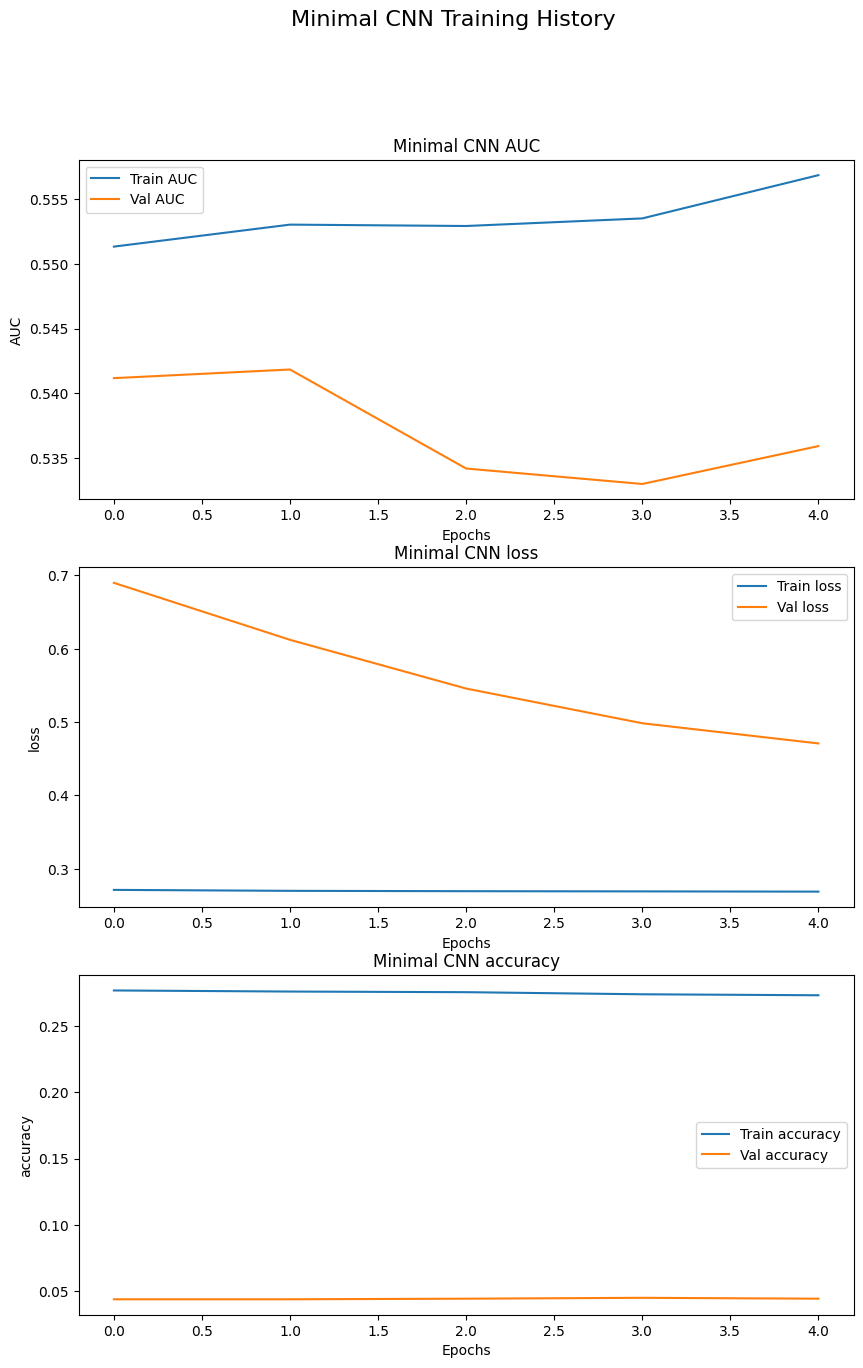

In [30]:
plot_training_history(history, model_name='Minimal CNN', metrics=['AUC', 'loss', 'accuracy'])

In [35]:
evaluate_label_distribution(test_ds)

,Label,Count,Percentage
0,label_1,3420.0,48.976085
1,label_2,175.0,2.506086
2,label_3,655.0,9.379923
3,label_4,191.0,2.735214
4,label_5,170.0,2.434484
5,label_6,209.0,2.992983
6,label_7,183.0,2.620650
7,label_8,332.0,4.754404
8,label_9,156.0,2.233997
9,label_10,221.0,3.164829


141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step
Mean Average Precision: 0.1765

Rapport de classification par classe:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      3420
           2       0.00      0.00      0.00       175
           3       0.15      1.00      0.25       655
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       209
           7       0.00      0.00      0.00       183
           8       0.15      0.16      0.16       332
           9       0.00      0.00      0.00       156
          10       0.00      0.00      0.00       221
          11       0.00      0.00      0.00        90
          13       0.00      0.00      0.00        91
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00       290
          16       0.04      0.93      0.07       165
          17       0.05

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


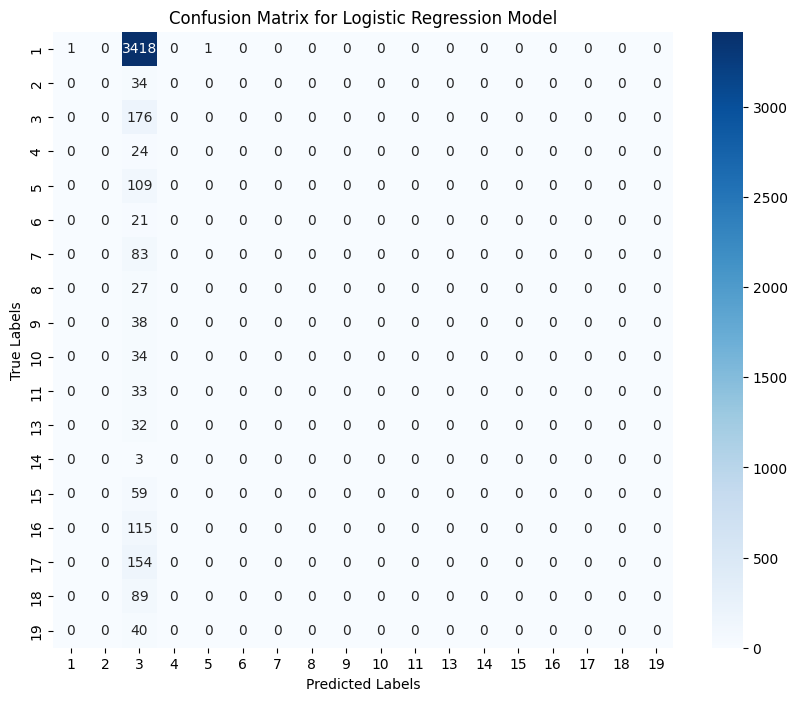

In [31]:
y_pred = model.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

y_true = test_df.iloc[:, 3:].values  # Assuming labels are in columns 1 to n

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision: {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

### CNN avancées

#### ResNet

##### Expérimentation 1

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [37]:
# Implemente RESNET
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

for layer in base_model.layers:
    layer.trainable = False

# Ajouter les nouvelles couches de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# creation du modele
model_resnet = Model(inputs=base_model.input, outputs=outputs)

model_resnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

# Afficher le résumé du modèle
# model_resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
history1 = model_resnet.fit(
    train_ds.map(lambda img, label, weight: (img, label, weight)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

# Evaluate the model
print("Evaluating model...")
model_resnet.evaluate(
    test_ds.map(lambda img, label: (img, label)),
    verbose=1
)

Epoch 1/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 125s 114ms/step - AUC: 0.5078 - accuracy: 0.2420 - loss: 219.7583 - val_AUC: 0.5000 - val_accuracy: 0.0216 - val_loss: 5912.7529
Epoch 2/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 108s 98ms/step - AUC: 0.5046 - accuracy: 0.1686 - loss: 1784.3834 - val_AUC: 0.5000 - val_accuracy: 0.0196 - val_loss: 10438.0391
Epoch 3/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 107s 97ms/step - AUC: 0.5057 - accuracy: 0.1747 - loss: 2968.8142 - val_AUC: 0.4977 - val_accuracy: 0.0062 - val_loss: 13707.1016
Epoch 4/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 116s 105ms/step - AUC: 0.5061 - accuracy: 0.1781 - loss: 3798.5151 - val_AUC: 0.5000 - val_accuracy: 0.0216 - val_loss: 17215.4609
Evaluating model...
141/141 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - AUC: 0.4977 - accuracy: 0.0152 - loss: 6044.8574


[5991.59716796875, 0.018481407314538956, 0.5]

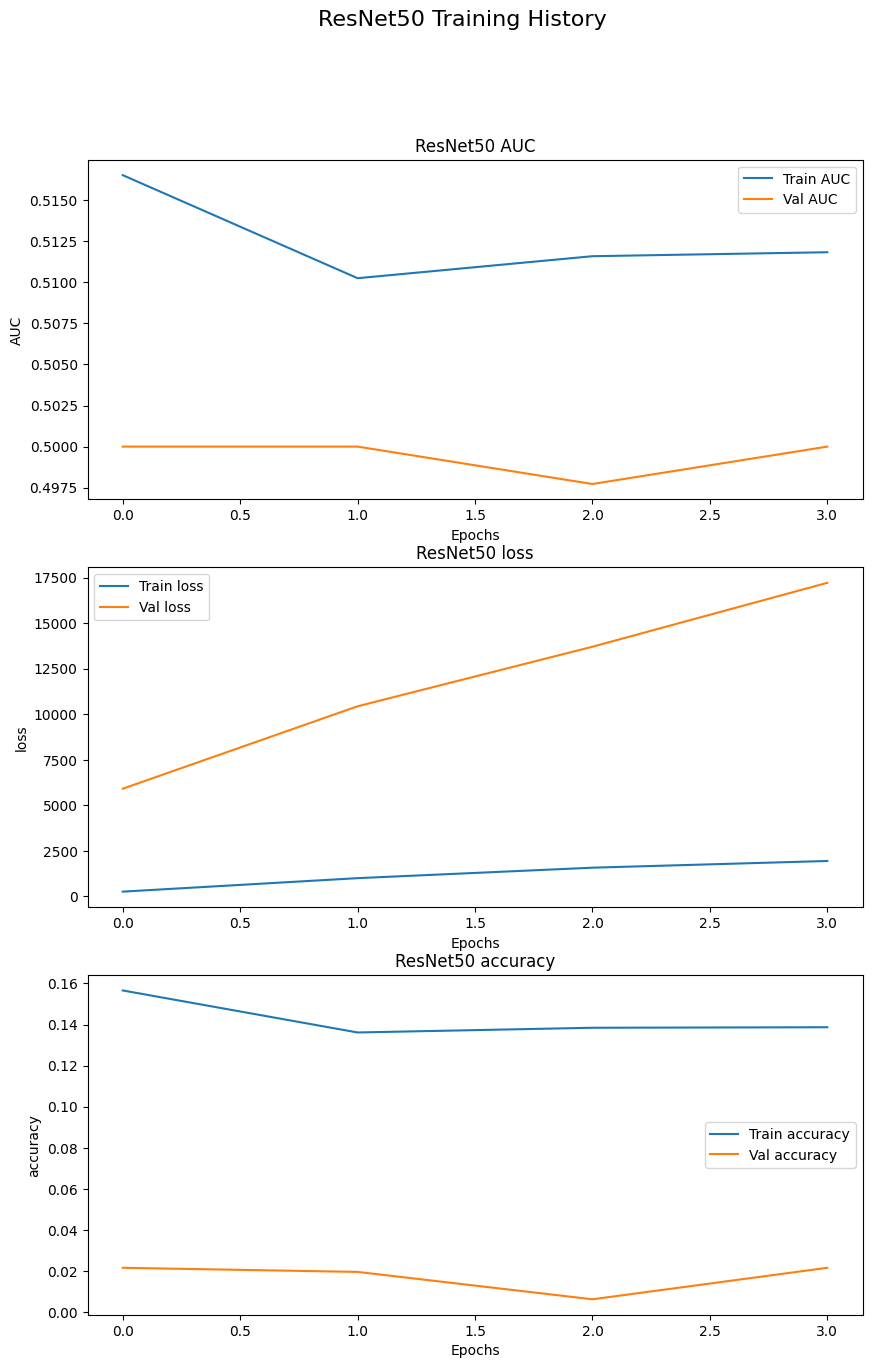

In [40]:
plot_training_history(history1, model_name='ResNet50', metrics=['AUC', 'loss', 'accuracy'])

141/141 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step
Mean Average Precision pour : 0.1446

Rapport de classification par classe:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3420
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00       655
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       209
           7       0.04      1.00      0.08       183
           8       0.00      0.00      0.00       332
           9       0.00      0.00      0.00       156
          10       0.00      0.00      0.00       221
          11       0.00      0.00      0.00        90
          13       0.00      0.00      0.00        91
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00       290
          16       0.04      1.00      0.07       165
          17   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


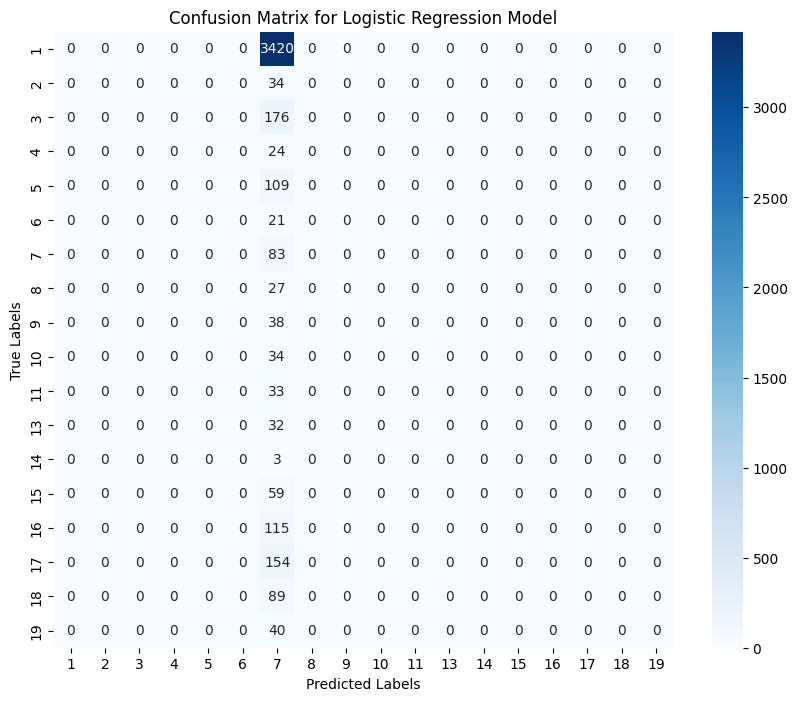

In [41]:
from sklearn.metrics import average_precision_score, classification_report


y_pred = model_resnet.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Expérimentation 2

In [42]:
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(len(train_df.columns[3:]), activation="softmax")(x)

# Création du modèle final
fine_tune_model_resnet = Model(inputs=base_model.input, outputs=outputs)

fine_tune_model_resnet = Model(inputs=base_model.input, outputs=outputs)

for layer in base_model.layers:
    # Dégeler uniquement les couches du dernier bloc qui sont plus specifiques a la tache a effectuer
    if 'conv5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

# Reduire le taux d'apprentissage pour eviter de trop modifier les poids deja appris
fine_tune_model_resnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

# fine_tune_model_resnet.summary()

In [43]:
history2 = fine_tune_model_resnet.fit(
    train_ds.map(lambda img, label, weight: (img, label, weight)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

# Evaluate the model
print("Evaluating model...")
fine_tune_model_resnet.evaluate(
    test_ds.map(lambda img, label: (img, label)),
    verbose=1
)

Epoch 1/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 189s 152ms/step - AUC: 0.5061 - accuracy: 0.2346 - loss: 3977.1990 - val_AUC: 0.5000 - val_accuracy: 0.0196 - val_loss: 126781.2422
Epoch 2/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 153s 139ms/step - AUC: 0.5053 - accuracy: 0.1647 - loss: 61609.1289 - val_AUC: 0.5000 - val_accuracy: 0.0062 - val_loss: 645229.3750
Epoch 3/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 153s 138ms/step - AUC: 0.5045 - accuracy: 0.1788 - loss: 287287.0000 - val_AUC: 0.5000 - val_accuracy: 0.0335 - val_loss: 1325814.6250
Epoch 4/5
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 203s 139ms/step - AUC: 0.5046 - accuracy: 0.1821 - loss: 565146.6250 - val_AUC: 0.5000 - val_accuracy: 0.0196 - val_loss: 1936325.2500
Evaluating model...
141/141 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - AUC: 0.4977 - accuracy: 0.0212 - loss: 129318.1562


[128206.5390625, 0.01981741189956665, 0.5]

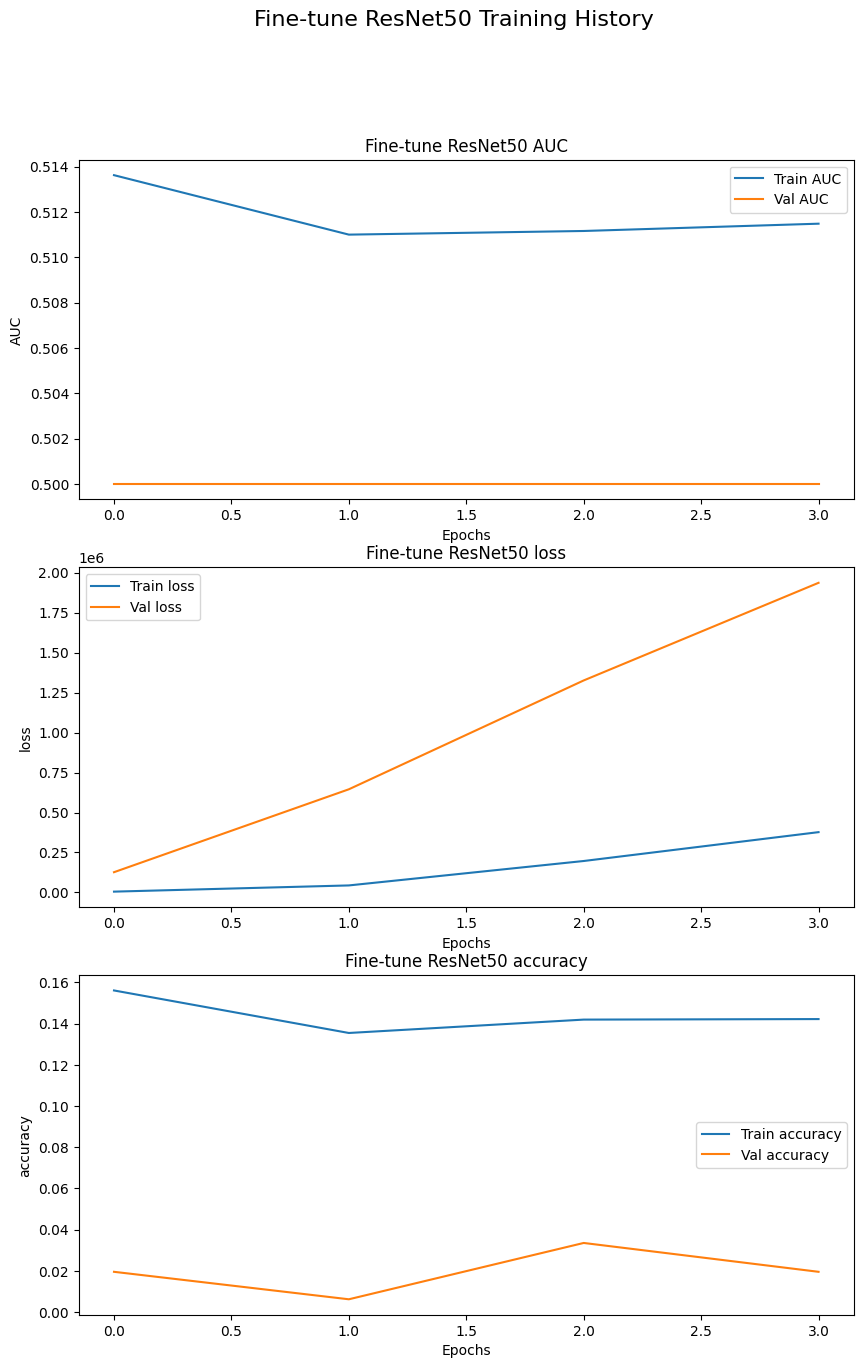

In [44]:
plot_training_history(history2, model_name='Fine-tune ResNet50', metrics=['AUC', 'loss', 'accuracy'])

141/141 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step
Mean Average Precision pour : 0.1171

Rapport de classification par classe:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3420
           2       0.00      0.00      0.00       175
           3       0.00      0.00      0.00       655
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       209
           7       0.00      0.00      0.00       183
           8       0.00      0.00      0.00       332
           9       0.00      0.00      0.00       156
          10       0.00      0.00      0.00       221
          11       0.00      0.00      0.00        90
          13       0.00      0.00      0.00        91
          14       0.00      0.00      0.00        38
          15       0.00      0.00      0.00       290
          16       0.00      0.00      0.00       165
          17   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


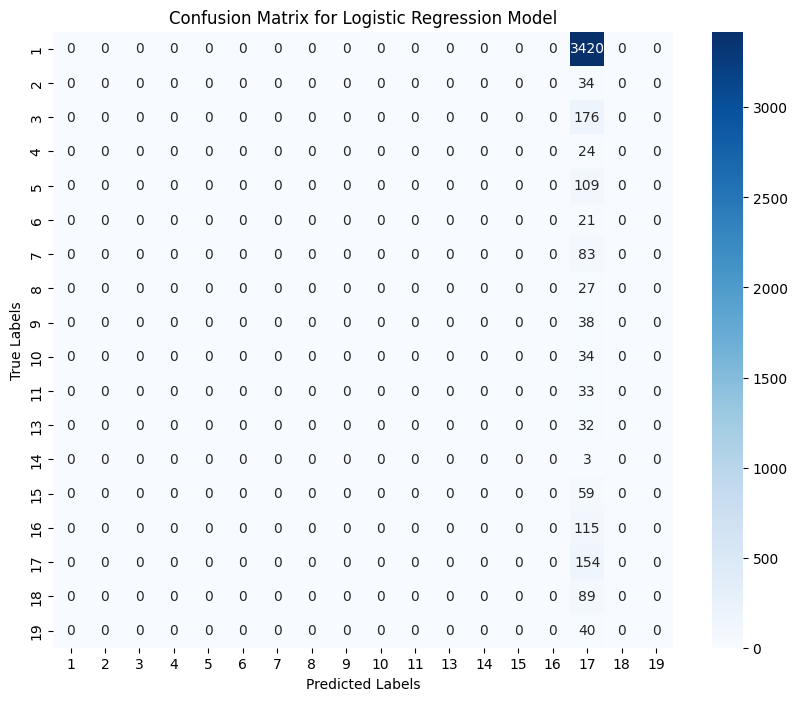

In [45]:
from sklearn.metrics import average_precision_score, classification_report


y_pred = fine_tune_model_resnet.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Expérimentation 3

In [ ]:

base_scratch_model_resnet = ResNet50(
    weights=None,
    include_top=False,
    input_shape=input_shape
)

x = base_scratch_model_resnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(len(train_df.columns[3:]), activation="softmax")(x)

model_scratch_resnest = Model(inputs=base_scratch_model_resnet.input, outputs=outputs)

model_scratch_resnest.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

model_scratch_resnest.summary()

In [ ]:
model_scratch_resnest.fit(
    train_ds.map(lambda img, label, weight: (img, label, weight)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback],
)

# Evaluate the model
print("Evaluating model...")
model_scratch_resnest.evaluate(
    test_ds.map(lambda img, label: (img, label)),
    verbose=1
)

In [ ]:
y_pred = model_scratch_resnest.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Compare

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que nous avons stocké les métriques d'évaluation
metrics = {
    'Modèle': ['Resnet50', 'Fine-tune ResNet50', 'ResNet50 Scratch'],
    'Accuracy': [
        model_resnet.evaluate(val_ds.map(lambda img, label: (img, label)))[1],
        fine_tune_model_resnet.evaluate(val_ds.map(lambda img, label: (img, label)))[1],
        model_scratch_resnest.evaluate(val_ds.map(lambda img, label: (img, label)))[1]
    ],
    'AUC': [
        model_resnet.evaluate(val_ds.map(lambda img, label: (img, label)))[2],
        fine_tune_model_resnet.evaluate(val_ds.map(lambda img, label: (img, label)))[2],
        model_scratch_resnest.evaluate(val_ds.map(lambda img, label: (img, label)))[2]
    ],
}

df_metrics = pd.DataFrame(metrics)
print("Comparaison des performances:")
print(df_metrics)

# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Modèle'], df_metrics['Accuracy'])
plt.title('Comparaison des performances des approches VGG16')
plt.xlabel('Modèle')
plt.ylabel('Précision (Accuracy)')
plt.ylim(0, 1)
for i, v in enumerate(df_metrics['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

#### EfficientNet

##### Experimentation 1

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_df.columns[3:]), activation='softmax')(x)

model_eff_transfer = Model(inputs=base_model.input, outputs=outputs)

model_eff_transfer.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

model_eff_transfer.summary()

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_eff_transfer.fit(
    train_ds.map(lambda img, label, weight: (img, label)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

print("Évaluation du modèle EfficientNet (transfert d'apprentissage):")
model_eff_transfer.evaluate(val_ds.map(lambda img, label: (img, label)))

In [ ]:
y_pred = model_eff_transfer.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Experimentation 2

In [ ]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_df.columns[3:]), activation='softmax')(x)

model_eff_finetune = Model(inputs=base_model.input, outputs=outputs)

# 4. Phase 1 : Entraînement avec toutes les couches de base gelées
for layer in base_model.layers:
    if "block5" in layer.name or "block4" in layer.name:
        layer.trainable = True

model_eff_finetune.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

model_eff_finetune.summary()

In [ ]:
model_eff_finetune.fit(
    train_ds.map(lambda img, label, weight: (img, label)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

print("Évaluation du modèle EfficientNetB0 (fine-tuning):")
model_eff_finetune.evaluate(val_ds.map(lambda img, label: (img, label)))

In [ ]:
y_pred = model_eff_finetune.predict(test_ds.map(lambda img, label: (img, label)))

y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Experimentation 3

In [ ]:

base_scratch_model_eff = EfficientNetB0(
    weights=None,  # Pas de poids préentraînés
    include_top=False,
    input_shape=(224, 224, 3)
)

x = base_scratch_model_eff.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_df.columns[3:]), activation='softmax')(x)

scratch_model_eff = Model(inputs=base_scratch_model_eff.input, outputs=outputs)

scratch_model_eff.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(
            name='AUC',
            multi_label=True,
            num_labels=len(train_df.columns[3:])
        )
    ]
)

scratch_model_eff.summary()

In [ ]:
scratch_model_eff.fit(
    train_ds.map(lambda img, label, weight: (img, label)),
    epochs=5,
    validation_data=val_ds.map(lambda img, label: (img, label)),
    callbacks=[callback]
)

print("Évaluation du modèle EfficientNetB0 (scratch):")
scratch_model_eff.evaluate(val_ds.map(lambda img, label: (img, label)))

In [ ]:
y_pred = scratch_model_eff.predict(test_ds.map(lambda img, label: (img, label)))
y_pred_binary = multi_label_threshold(y_pred, threshold_nb=3)

avg_precision = average_precision_score(y_true, y_pred, average='samples')
print(f"Mean Average Precision pour : {avg_precision:.4f}")

print("\nRapport de classification par classe:")
print(classification_report(y_true, y_pred_binary, target_names=train_df.columns[3:]))

confusion_matrice_multilabel(y_true, y_pred_binary, labels=train_df.columns[3:])

##### Compare

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supposons que nous avons stocké les métriques d'évaluation
one = model_eff_transfer.evaluate(val_ds.map(lambda img, label: (img, label)))
two = model_eff_finetune.evaluate(val_ds.map(lambda img, label: (img, label)))
three = scratch_model_eff.evaluate(val_ds.map(lambda img, label: (img, label)))

metrics = {
    'Modèle': ['EfficientNet - Transfert', 'EfficientNet - Fine-tuning', 'EfficientNet - From Scratch'],
    'Accuracy': [
        one[1],
        two[1],
        three[1]
    ],
    'AUC': [
        one[2],
        two[2],
        three[2]
    ],
}

df_metrics = pd.DataFrame(metrics)
print("Comparaison des performances:")
print(df_metrics)

# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(df_metrics['Modèle'], df_metrics['Accuracy'])
plt.title('Comparaison des performances des approches EfficientNet')
plt.xlabel('Modèle')
plt.ylabel('Précision (Accuracy)')
plt.ylim(0, 1)
for i, v in enumerate(df_metrics['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.tight_layout()
plt.show()

## Analyse des résultats

### Quelques exemples

In [ ]:
## Le transfert de poid du EfficientNet nous a donné le meilleur AUC


batch = next(iter(test_ds))

images_batch, labels_batch = batch
preds_img = model_eff_transfer.predict(images_batch)
plt.figure(figsize=(10, 10))

for i in range(min(9, images_batch.shape[0])):
    true_labels = train_df.iloc[:, 3:].columns[labels_batch[i] == 1]
    print(f"True:{true_labels}")
    predicted_labels = train_df.iloc[:, 3:].columns[preds_img[i] > 0.4]
    print(f"Pred:{predicted_labels}")
    print(f"Pred: {np.around(preds_img[i], 1)}\nTrue: {labels_batch[i]}")
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_batch[i])
    plt.title(f"Pred: {predicted_labels}\nTrue: {true_labels}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Explicability avec LIME

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import numpy as np


explainer = lime_image.LimeImageExplainer()

# Select an image from the test dataset
for img, label in test_ds.take(1):
    img = img[0].numpy()
    label = label[0].numpy()


def predict_fn(images):
    return model.predict(images)


explanation = explainer.explain_instance(
    img.astype('double'),
    predict_fn,
    top_labels=3,
    hide_color=0,
    num_samples=1000
)


temp, mask = explanation.get_image_and_mask(
    label=np.argmax(label),
    positive_only=True,
    num_features=5,
    hide_rest=False
)


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Explanation")
plt.axis('off')
plt.show()

In [ ]:
# Examine prediction errors
for img, label in test_ds.take(1):
    preds = model.predict(img)
    preds_binary = multi_label_threshold(preds, threshold_nb=3)
    true_labels = label.numpy()

    # Identify misclassified examples
    for i in range(len(true_labels)):
        if not np.array_equal(true_labels[i], preds_binary[i]):
            print(f"Example {i}:")
            print(f"True Labels: {train_df.columns[3:][true_labels[i] == 1]}")
            print(f"Predicted Labels: {train_df.columns[3:][preds_binary[i] == 1]}")
            plt.imshow(img[i].numpy())
            plt.title(f"Misclassified Example {i}")
            plt.axis('off')
            plt.show()

In [ ]:
model_eff_transfer.save('model_eff_transfer.h5')